## Boston Housing Prices

# 1. DEFINE

#### 1.1 Defining the problem

In [2]:
# The aim of this problem is to estimate the house prices in Boston city.
# The dataset was collected in 1978 and consists of 13 factors which influnce the house prices in the suburbs of Boston city.

In [3]:
# As we are trying to predict a numerical value, i.e. the price of the house based on a known dataset, 
# this problem becomes a regression problem.

In [4]:
# Importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import statsmodels.tools.tools

# 2. DISCOVER

#### 2.1 Load the data

In [7]:
# Training data set
train_set = pd.read_csv('train.csv')
train_set.head();

In [8]:
# Testing data set
test_set = pd.read_csv('test.csv')
test_set.head();

*__ 'medv' is the target variable we are trying to predict/estimate in this problem.__* <br />

#### 2.2 Clean the data

In [9]:
# Creating a copy of the original data to ensure its not lost
train = train_set.copy()
test = test_set.copy()

In [10]:
train = train.rename(index=str, columns={"crim": "Crime", "zn": "Zoned", "indus":"Indus", "chas": "Charles",
                                "nox": "NOX", "rm": "Room", "age": "Age","dis": "Distance","rad": "Radian",
                                "tax":"Tax", "ptratio":"PTratio", "black": "Black", "lstat": "LowerStatus",
                                "medv":"medianValue"})
test = test.rename(index=str, columns={"crim": "Crime", "zn": "Zoned", "indus":"Indus", "chas": "Charles",
                                "nox": "NOX", "rm": "Room", "age": "Age","dis": "Distance","rad": "Radian",
                                "tax":"Tax", "ptratio":"PTratio", "black": "Black", "lstat": "LowerStatus"})

In [11]:
# Since the data appears to be pretty much clean at this stage, will just proceed as it is.

#### 2.3 Explore the data (EDA)

In [12]:
train.shape

(333, 15)

The train set consists of 333 entries (rows) and 15 columns, of which one if the target feature and one is the id column

In [17]:
test.shape

(173, 14)

The test set consists of 173 entries (rows) and 14 columns. It does not contain the target feature column.

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 332
Data columns (total 15 columns):
ID             333 non-null int64
Crime          333 non-null float64
Zoned          333 non-null float64
Indus          333 non-null float64
Charles        333 non-null int64
NOX            333 non-null float64
Room           333 non-null float64
Age            333 non-null float64
Distance       333 non-null float64
Radian         333 non-null int64
Tax            333 non-null int64
PTratio        333 non-null float64
Black          333 non-null float64
LowerStatus    333 non-null float64
medianValue    333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 41.6+ KB


This shows that we will be dealing only with numrical data in this problem.

__Checking for null values in the dataset__

In [20]:
train.isnull().sum();

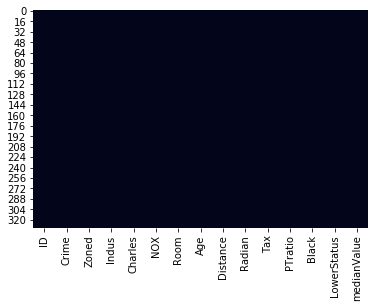

In [21]:
sns.heatmap(train.isnull(), cbar=False)

In [22]:
test.isnull().sum();

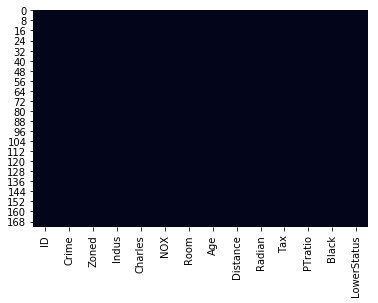

In [23]:
sns.heatmap(test.isnull(), cbar=False)

There are no missing values in the dataset.

In [24]:
# Understanding he relation between dependent (medv) and independent variables

<Figure size 1080x720 with 0 Axes>

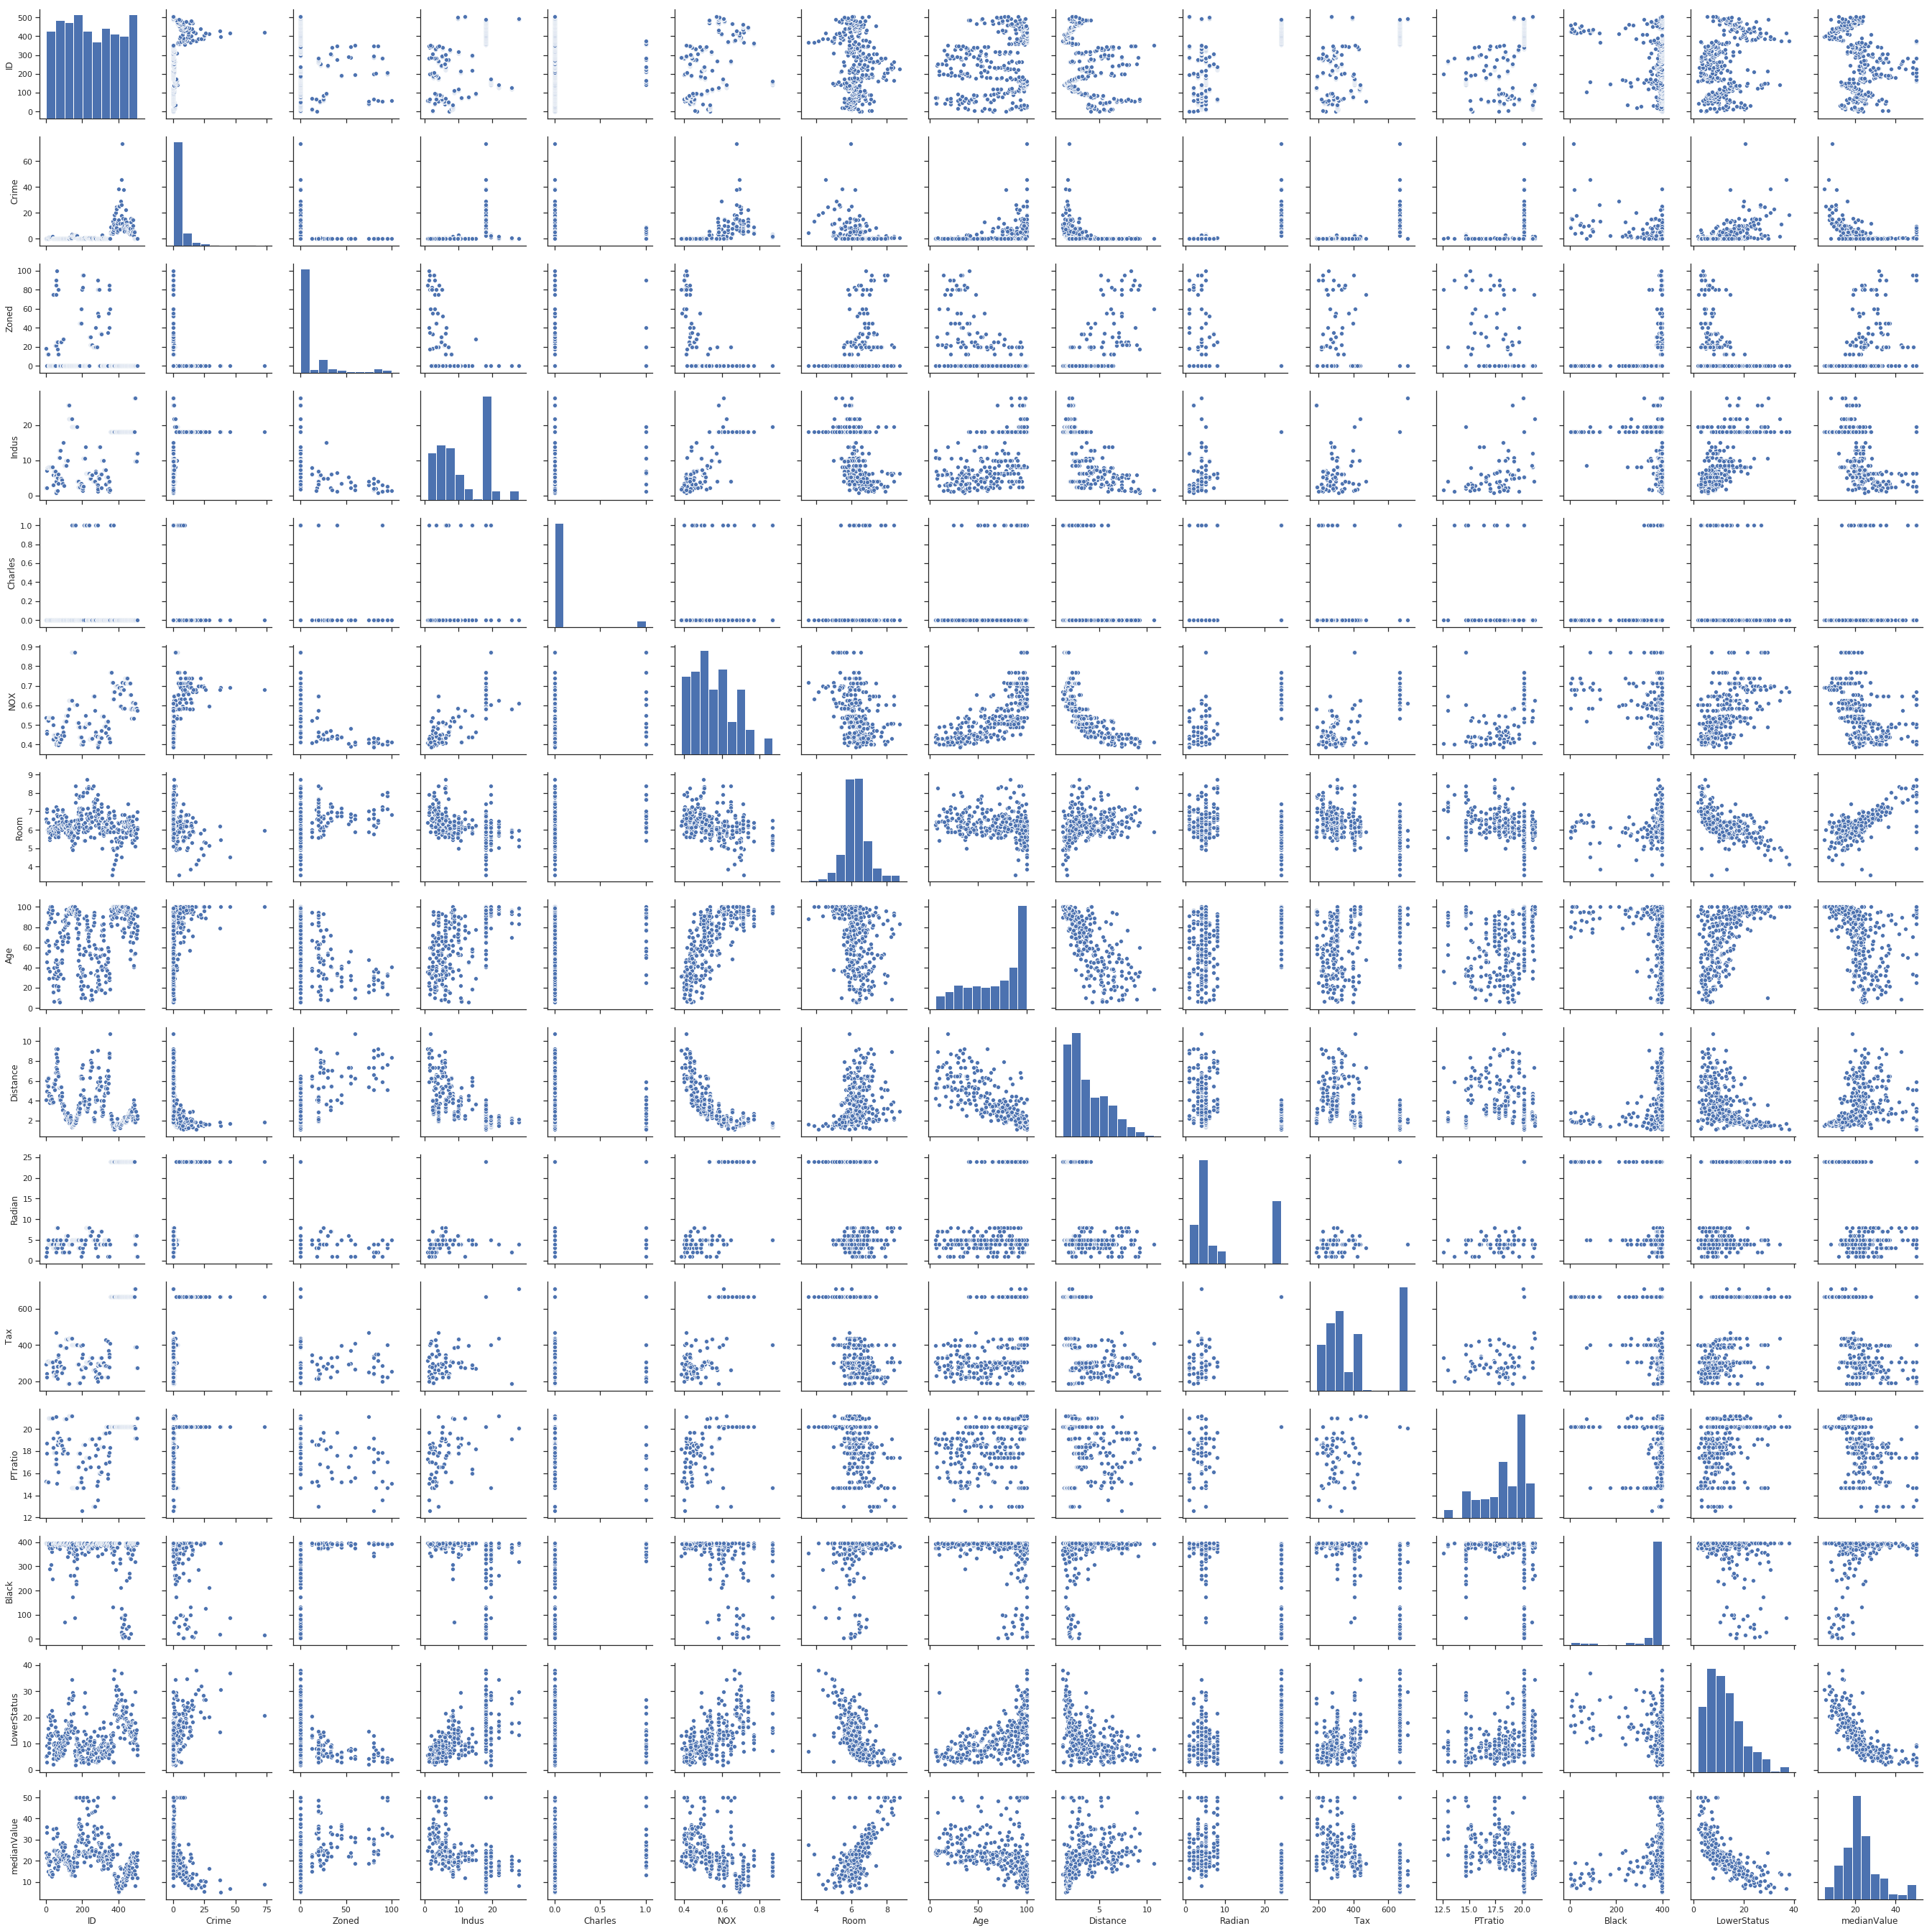

In [25]:
correlation_plot = plt.figure(figsize = (15,10))
sns.set(style="ticks", color_codes=True)
sns.pairplot(train);

If we carefully observe the last row of this pairplot, we can establish the relation of the target varaible 'medianValue' to the rest of the features. <br \>
'ID' does not show any specific pattern in the relation with medianValue.<br \>
'Crime' has a nearly negative relation<br \>
'Zoned' does not show any specific relation<br \>
'Indus' kind of reflects a negative relation<br \>
'Charles' does not show a specific relation<br \>
'NOX' has somewhat negative relation<br \>
'Room' has a significant positive relation<br \>
'Age' has nearly negative relation<br \>
'Distance' depicts a positive relation<br \>
'Radian' has somewhat negative relation<br \>
'Tax' has kind of negative relation<br \>
'PTRatio' has negative relation<br \>
'Black' has positive relation<br \>
'LowerStatus' has a significant negative relation<br \>

So, to sum up - <br \>
__No relation__ - ID, Zoned, Charles<br \>
__Positive relation__ - Room, Distance, Black<br \>
__Negative relation__  - Crime,Indus, NOX, Age, Radian, Tax, PTRatio, LowerStatus

In [26]:
train.describe()

,ID,Crime,Zoned,Indus,Charles,NOX,Room,Age,Distance,Radian,Tax,PTratio,Black,LowerStatus,medianValue
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


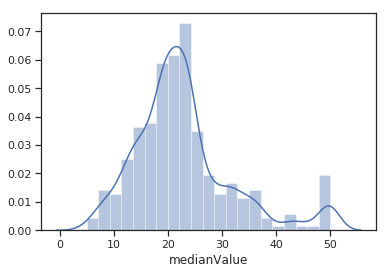

In [27]:
sns.distplot(train['medianValue'])

So, the house prices are not normally distributed and are right skewed. <br \>

In [28]:
train['medianValue'].describe()

count    333.000000
mean      22.768769
std        9.173468
min        5.000000
25%       17.400000
50%       21.600000
75%       25.000000
max       50.000000
Name: medianValue, dtype: float64

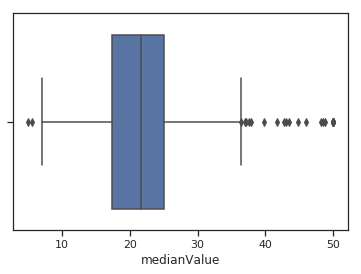

In [29]:
sns.boxplot(train['medianValue'])

There are some outliers in the training data set. <br \>
Is it wise to get rid of outliers in this data set?

# 3. DEVELOP

Let's start with a Linear Regression Model to predict the prices of house.

First, separating the features from the target variable.

In [30]:
cols = [col for col in train.columns if col not in ['medianValue']]
features = train[cols]
features.head()

,ID,Crime,Zoned,Indus,Charles,NOX,Room,Age,Distance,Radian,Tax,PTratio,Black,LowerStatus
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43


In [31]:
target = train['medianValue']
target.head()

0    24.0
1    21.6
2    33.4
3    36.2
4    22.9
Name: medianValue, dtype: float64

Creating Linear Regression Model

In [32]:
lr_model = LinearRegression()
lr_model.fit(features, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
lr_model.coef_

array([-4.54789253e-03, -5.17062363e-02,  4.93344687e-02,  5.34084254e-02,
        3.78011391e+00, -1.54106687e+01,  3.87910457e+00, -9.51042267e-03,
       -1.60411361e+00,  3.61780090e-01, -1.14966409e-02, -8.48538613e-01,
        1.18853164e-02, -6.01842329e-01])

After fitting the Linear Regression Model the equation becomes -  <br \>
    + medianValue = (-4.54789253e-03)* ID + (-5.17062363e-02) * CRIME + (4.93344687e-02) * ZONE + 
                    (5.34084254e-02)* INDUS + (3.78011391e+00)* CHARLES + (-1.54106687e+01)* NOX + 
                    (3.87910457e+00)* ROOM + (-9.51042267e-03)* AGE + (-1.60411361e+00)* DISTANCE + 
                    (3.61780090e-01)* RADIAN + (-1.14966409e-02)* TAX + (-8.48538613e-01)* PTRatio + 
                    (1.18853164e-02)* BLACK + (-6.01842329e-01)* LOWERSTATUS

In [51]:
lr_model.score(features, target)

0.7355786478533117

The R^2 value of this model, if not best, is quite good.

In [34]:
y_pred = lr_model.predict(features)

Text(0, 0.5, 'Predicted prices: $\\hat{Y}_i$')

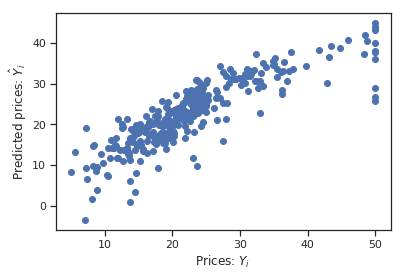

In [48]:
plt.scatter(target, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")

This shows a significant linear relation between the predicted and actual prices of the house. <br \>
Let's optimize the regression equation even more by keeping only significant variables in the equation using backward elimination.

#### Backward Elimination

In [36]:
features.shape

(333, 14)

In [37]:
features.head()

,ID,Crime,Zoned,Indus,Charles,NOX,Room,Age,Distance,Radian,Tax,PTratio,Black,LowerStatus
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43


First, we need to add a constant in the data set which is used as the intercpt. 

In [49]:
opt_features = statsmodels.tools.add_constant(features)
opt_features.head()

/home/oshijain/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,ID,Crime,Zoned,Indus,Charles,NOX,Room,Age,Distance,Radian,Tax,PTratio,Black,LowerStatus
0,1.0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,1.0,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,1.0,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,1.0,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,1.0,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43


In [39]:
opt_features.shape

(333, 15)

In [50]:
# Converting to numpy array to perform backwards elimination
opt_features = opt_features.iloc[:,:].values

In [41]:
opt_features = opt_features[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]]
lr_OLS = sm.OLS(endog = target, exog = opt_features).fit()
lr_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            medianValue   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     63.19
Date:                Tue, 18 Jun 2019   Prob (F-statistic):           5.73e-83
Time:                        10:57:11   Log-Likelihood:                -988.56
No. Observations:                 333   AIC:                             2007.
Df Residuals:                     318   BIC:                             2064.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.7412      6.280      5.373      0.000      21.386      46.096
x1            -0.0045      0.003     -1.713      0.088      -0.010       0.001
x2            -0.0517      0.054     -0.964      0.336      -0.157       0.054
x3             0.0493      0.017      2.919      0.004       0.016       0.083
x4             0.0534      0.074      0.722      0.471      -0.092       0.199
x5             3.7801      1.146      3.297      0.001       1.525       6.036
x6           -15.4107      4.845     -3.181      0.002     -24.943      -5.878
x7             3.8791      0.522      7.424      0.000       2.851       4.907
x8            -0.0095      0.017     -0.557      0.578      -0.043       0.024
x9            -1.6041      0.265     -6.043      0.000      -2.126      -1.082
x10            0.3618      0.084      4.316      0.000       0.197       0.527
x11           -0.0115      0.005     -2.513      0.012      -0.020      -0.002
x12           -0.8485      0.165     -5.145      0.000      -1.173      -0.524
x13            0.0119      0.004      3.312      0.001       0.005       0.019
x14           -0.6018      0.064     -9.455      0.000      -0.727      -0.477
==============================================================================
Omnibus:                      122.923   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              464.963
Skew:                           1.588   Prob(JB):                    1.08e-101
Kurtosis:                       7.839   Cond. No.                     1.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The p-value for x1 (ID), x2 (CRIME), x4 (Indus) and x8 (Age) have p-value only a little higher than the significance level of 0.05. <br \>
This means, they should not really affect the model performance.<br \>
To confirm our belief, let's omit these variables and check for the performance of the model.

In [42]:
opt_features = opt_features[:,[0,3,5,6,7,9,10,11,12,13,14]]
lr_OLS = sm.OLS(endog = target, exog = opt_features).fit()
lr_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            medianValue   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     87.83
Date:                Tue, 18 Jun 2019   Prob (F-statistic):           8.60e-86
Time:                        10:57:17   Log-Likelihood:                -990.96
No. Observations:                 333   AIC:                             2004.
Df Residuals:                     322   BIC:                             2046.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.1320      6.197      5.346      0.000      20.939      45.325
x1             0.0450      0.017      2.710      0.007       0.012       0.078
x2             3.8733      1.144      3.387      0.001       1.623       6.123
x3           -14.7806      4.502     -3.283      0.001     -23.637      -5.924
x4             3.7271      0.502      7.423      0.000       2.739       4.715
x5            -1.5377      0.238     -6.459      0.000      -2.006      -1.069
x6             0.2867      0.073      3.919      0.000       0.143       0.431
x7            -0.0113      0.004     -2.786      0.006      -0.019      -0.003
x8            -0.8357      0.162     -5.147      0.000      -1.155      -0.516
x9             0.0125      0.003      3.605      0.000       0.006       0.019
x10           -0.6151      0.058    -10.548      0.000      -0.730      -0.500
==============================================================================
Omnibus:                      122.611   Durbin-Watson:                   1.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.191
Skew:                           1.574   Prob(JB):                    1.07e-103
Kurtosis:                       7.926   Cond. No.                     1.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

So now the regression equation becomes: <br \>
    + medianValue = (33.1320) + (0.0450)* Zoned + (3.8733)* Charles + (-14.7806)* NOX +
                    (3.7271)* Room + (-1.5377)* Distance + (0.2867)* Radian + 
                    (-0.0113)* Tax + (-0.8357)* PTRatio + (0.0125)* Black +
                    (-0.6151)* LowerStatus

Now predicting the values with optimal set of features obtained using backward elimination.

In [53]:
lr_model_OLS = LinearRegression()
lr_model_OLS.fit(opt_features, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
lr_model_OLS.score(opt_features, target)

0.7355786478533118

The R^2 value of the model did not change with backwards elimination. <br \>
This means that even though the p-value of x1 (ID), x2 (CRIME), x4 (Indus) and x8 (Age) is higher the significance level, but it's effect on the prediction is very low. <br \>
So, the absence or presence of these features does not really affect the model performance.

# 4. DEPLOY

Prediciting the house prices for data in the test set.

In [59]:
house_price = lr_model.predict(test)
house_price

array([31.27947429, 25.64467092, 18.66939919,  9.70469293, 18.18776827,
       17.25721236, 19.17726072, 15.73496669, 13.24982207, 15.5718257 ,
       19.86982974, 21.36318328,  7.7493535 , 14.12561852, 24.37918489,
       22.78142834, 23.92830169, 28.95121883,  6.98337459, 28.13150174,
       21.49340364, 24.3633102 , 21.0157493 , 22.27629255, 21.48174445,
       23.1349735 , 26.53357032, 27.40764862, 29.63245149, 28.66678691,
       36.01716279, 35.76571544, 32.41445524, 21.78926285, 18.52394786,
       21.24472516, 20.6427661 , 20.48508635, 20.22964004, 22.77639638,
       14.56069361, 20.93906783, 21.03828501, 17.81868028, 13.61749515,
       12.01152334,  8.28275913, 15.72540189, 18.82390015, 21.90036804,
       21.23938497, 33.93579311, 42.64212385, 26.35818872, 21.59393999,
       23.90512336, 32.5148109 , 40.69463756, 35.37480505, 33.69092227,
       30.03049353, 36.9894938 , 16.80662396, 16.43691169, 22.36650512,
       23.20489902, 24.48558839, 28.03618599, 24.99532562, 30.30

In [61]:
# Let's arrange the predictions according to the submission file
submission_file = pd.DataFrame()
submission_file['ID'] = test['ID']
submission_file['medv'] = house_price
submission_file.head()

,ID,medv
0,3,31.279474
1,6,25.644671
2,8,18.669399
3,9,9.704693
4,10,18.187768


In [62]:
# Converting to csv format
submission_file.to_csv('LinearRegression.csv', index=False)

In [63]:
submissions_check = pd.read_csv("LinearRegression.csv")
submissions_check.head()

,ID,medv
0,3,31.279474
1,6,25.644671
2,8,18.669399
3,9,9.704693
4,10,18.187768


# References